# 데이터 불러오기 및 EDA 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


boston=pd.read_csv('boston_price.csv')
boston = boston.drop('CAT. MEDV', axis=1)
df = boston
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.dtypes #변수 별 데이터 타입 확인하기

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
#범주형/연속형 구분 - 변수형 데이터가 존재 시, 분석 진행할 때 형태를 바꾸기 위함

numerical_feats = df.dtypes[df.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df.dtypes[df.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  14
Number of Categorical features:  0


In [16]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )
    
#왜도, 첨도를 확인하여 데이터의 분포를 확인

CRIM            Skewness: 05.22     Kurtosis: 037.13
ZN              Skewness: 02.23     Kurtosis: 004.03
INDUS           Skewness: 00.30     Kurtosis: -01.23
CHAS            Skewness: 03.41     Kurtosis: 009.64
NOX             Skewness: 00.73     Kurtosis: -00.06
RM              Skewness: 00.40     Kurtosis: 001.89
AGE             Skewness: -0.60     Kurtosis: -00.97
DIS             Skewness: 01.01     Kurtosis: 000.49
RAD             Skewness: 01.00     Kurtosis: -00.87
TAX             Skewness: 00.67     Kurtosis: -01.14
PTRATIO         Skewness: -0.80     Kurtosis: -00.29
B               Skewness: -2.89     Kurtosis: 007.23
LSTAT           Skewness: 00.91     Kurtosis: 000.49
MEDV            Skewness: 01.11     Kurtosis: 001.50


<AxesSubplot: >

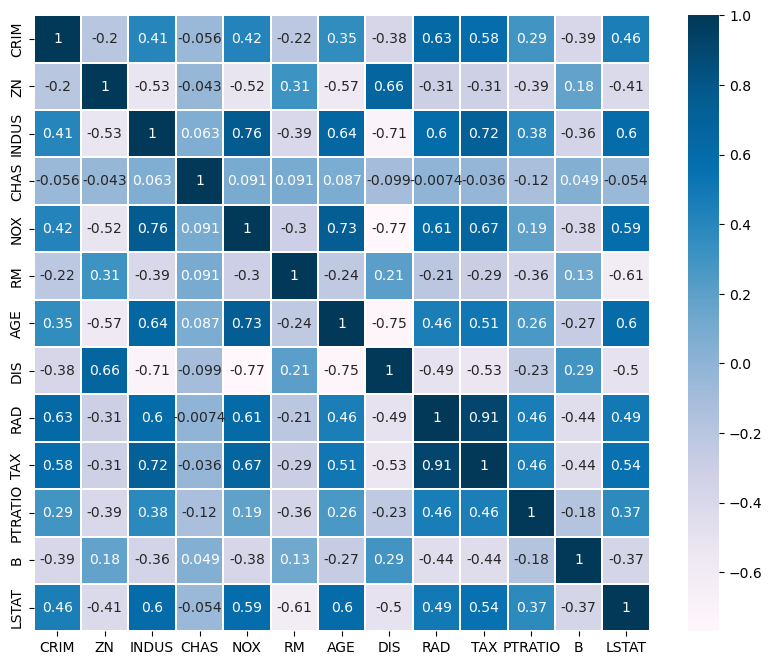

In [17]:
heatmap_data = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO","B","LSTAT"]]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})
#히트맵을 통해 독립변수 간 상관관계를 확인하기. 다중공선성 확인 위함.

/var/folders/gt/80h1n6391ld3ygqqrdytm5hw0000gn/T/ipykernel_11780/450246233.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


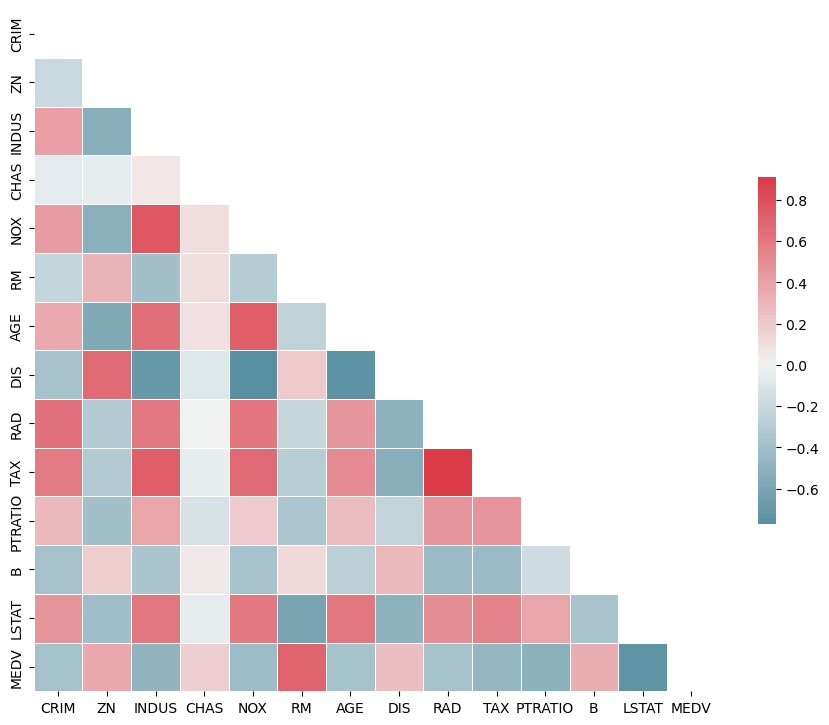

In [18]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#또한, 참고삼아서 독립변수 + target data 포함하여 히트맵 분석 진행

feature engineering 진행. standardScaler 이용.
데이터 상 MEDV를 제거하여 모든 데이터를 정규화 진행


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_scaled=df.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1]=df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


/var/folders/gt/80h1n6391ld3ygqqrdytm5hw0000gn/T/ipykernel_11780/715070326.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MEDV"])


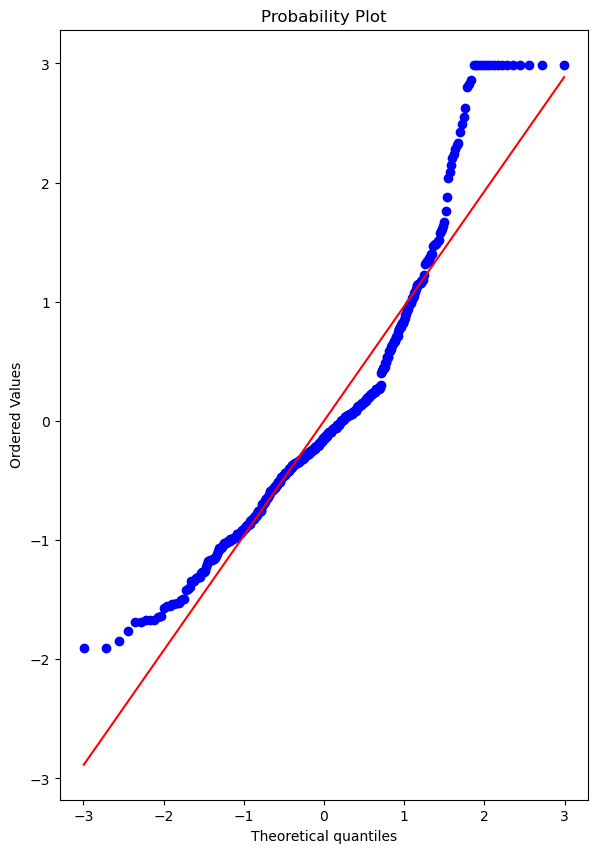

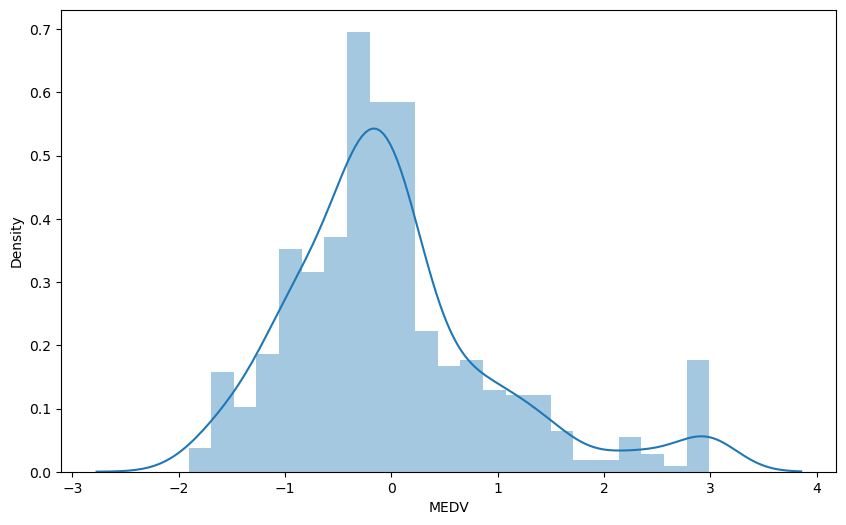

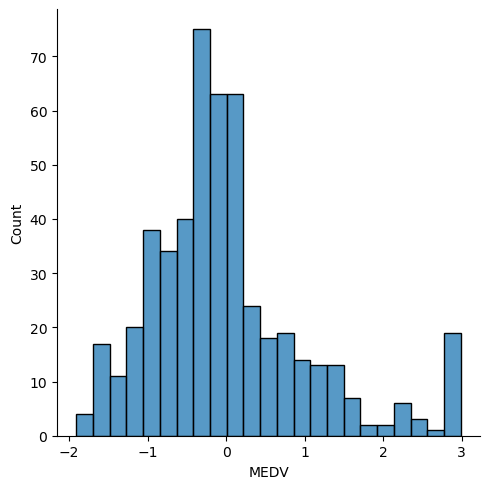

In [23]:
'''
이후, 타겟변수의 정규화 필요여부를 확인하기 위하여 타겟변수 포함해 정규화.
'''

#1. 정규화 이전 원본 데이터의 분포 확인

from scipy import stats

#정규성을 띄는지 확인
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df['MEDV'], plot=plt)

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(df["MEDV"])

#그래프로 확인
sns.displot(x='MEDV', kind='hist', data=df)
plt.show()


In [24]:
#2. target 변수의 정규화 진행 및 분석

df_scaled=df.iloc[:, :]  
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :]=df_scaled[:, :]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


/var/folders/gt/80h1n6391ld3ygqqrdytm5hw0000gn/T/ipykernel_11780/1031958024.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MEDV"])


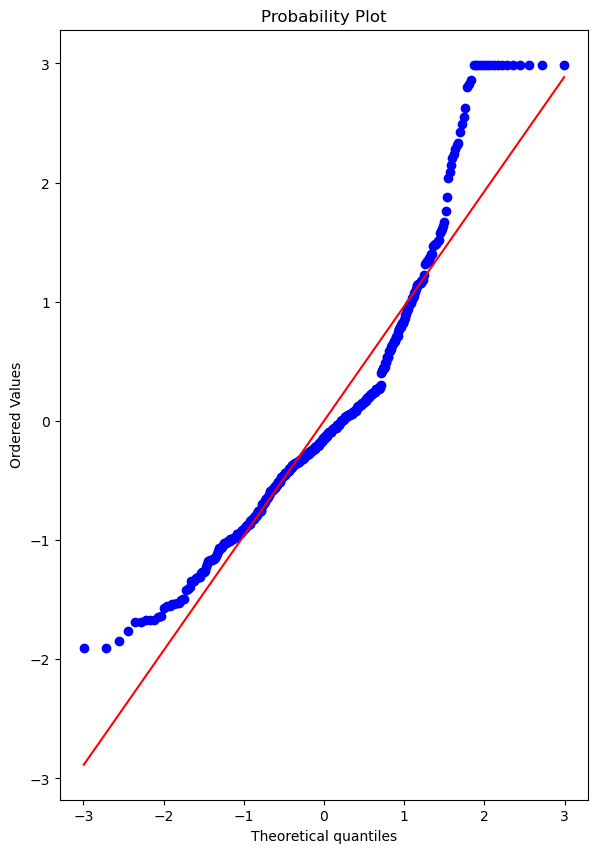

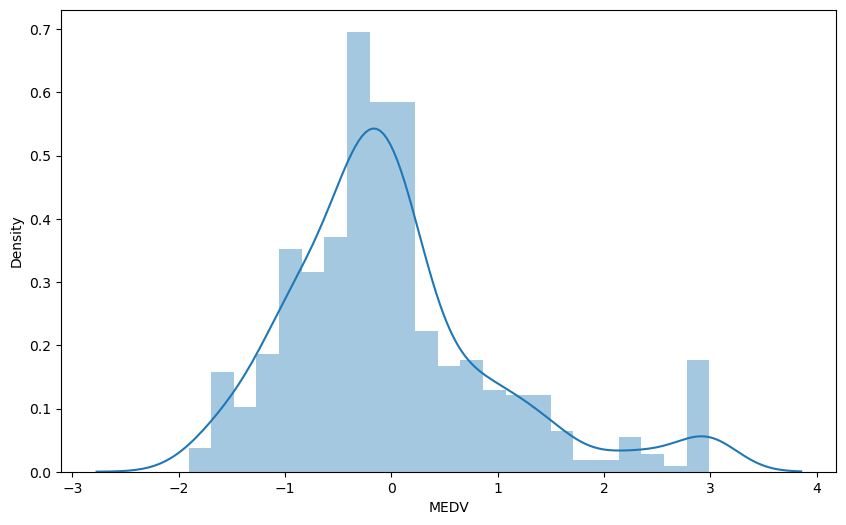

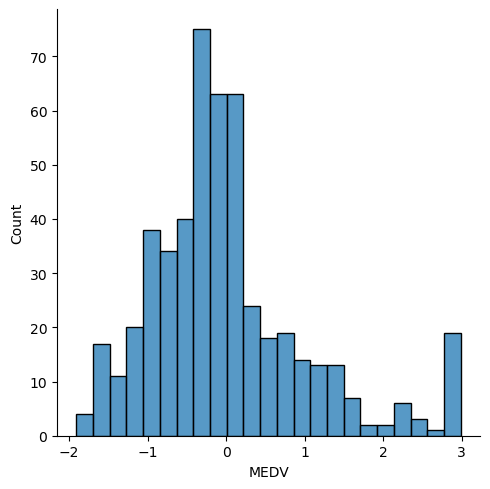

In [25]:
#정규성을 띄는지 확인
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df['MEDV'], plot=plt)

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(df["MEDV"])

#그래프로 확인
sns.displot(x='MEDV', kind='hist', data=df)
plt.show()

#크게 변화가 없으므로, 원본 데이터를 유지하여 진행하기

In [27]:
#타겟변수 제외하고 정규화 복귀


boston=pd.read_csv('boston_price.csv')
boston = boston.drop('CAT. MEDV', axis=1)
df = boston

df_scaled=df.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1]=df_scaled[:, :]
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [28]:
#이후, 다중공선성 확인을 위하여 vif 돌리기

from statsmodels.datasets.longley import load_pandas
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX=df.iloc[:,:-1]
dfX.head()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

#다중공선성 확인, 수치가 높을 수록 타 독립변수에 의존도가 높은 것.
#https://datascienceschool.net/03%20machine%20learning/06.04%20다중공선성

#절대적인 기준에 따르면 10을 넘는 feature가 없으므로 다중공선성이 없다고 봐도 무방
#그러나, TAX, RAD 정도는 다중공선성이 다른 변수들에 비해 꽤 높으므로 없어도 괜찮을 듯 함

,VIF Factor,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS



# 변수 선택 및 데이터셋 분리, 모델 만들기

In [29]:
'''
변수 선택의 경우, 모든 변수를 사용해도 괜찮지만 target feature와 상관관계가 높은
변수들을 나열하여 선택할 예정. 따라서 상관관계 분석 확인
'''

corr_order=df.corr().loc[:'LSTAT','MEDV'].abs().sort_values(ascending=False)

corr_order
#MEDV(Target)과 상관관계가 높은 데이터 순으로 출력
#상관관계가 높은 변수 2개, 3개, 4개 ,... 이렇게 계속 확인하기
#뒤에서 얘기하겠지만, 변수가 3개일때 r^2가 가장 높아서 그렇게 선택했음
#단, 재은님이 모든 변수를 넣어 진행했을 때 오히려 결과값이 더 좋은 점은 감안.
#모든 분석을 진행하는 것에 초점을 맞추어야 하므로 값이 좋고 나쁨에 신경쓰지 말것!

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [31]:
#다중선형회귀 모델을 통해 예측 진행하기

#1) 데이터셋 분할  (두 개 변수 선택 시)

from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['LSTAT', 'RM']]
y_data=df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [32]:
#2) 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegression()
y_preds = lr.predict(x_test)

# rmse를 활용한 평가, 생각보다 결과값이 좋지 않음.
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')
print(lr.score(x_train, y_train)) #train set R^2 점수
print(lr.score(x_test, y_test)) #test set R^2 점수
#썩 결과가 좋지 않음 -> 두 개만 썼을때

MSE : 29.507, RMSE: 5.432
Variance score : 0.639
0.6376199854440077
0.6388882580693105


In [33]:
#변수 세 개로 늘렸을 때

from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['LSTAT', 'RM', 'PTRATIO']]
y_data=df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 3) (404,)
(102, 3) (102,)


In [34]:
#선형회귀 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegression()
y_preds = lr.predict(x_test)

# rmse를 활용한 평가, 생각보다 결과값이 좋지 않음.
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')
print(lr.score(x_train, y_train)) #train set R^2 점수
print(lr.score(x_test, y_test)) #test set R^2 점수
#변수를 세 개 썼을 때 조금 더 결과가 나아짐

MSE : 23.181, RMSE: 4.815
Variance score : 0.716
0.6682522630629685
0.7163066344313509


In [35]:
#변수를 네 개 선택했을 때


from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
y_data=df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 4) (404,)
(102, 4) (102,)


In [37]:
#선형회귀 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegression()
y_preds = lr.predict(x_test)

# rmse를 활용한 평가, 생각보다 결과값이 좋지 않음.
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')
print(lr.score(x_train, y_train)) #train set R^2 점수
print(lr.score(x_test, y_test)) #test set R^2 점수
#변수를 세 개 썼을 때와 큰 차이는 없지만, 그래도 세 개 썼을 떄가 아주 조금 더 나음.
#따라서, 세 개 변수를 쓰며 분석을 진행해보자.

MSE : 23.353, RMSE: 4.832
Variance score : 0.714
0.6685680131124931
0.7142017076935439


In [38]:
#변수 세 개로 늘렸을 때

from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['LSTAT', 'RM', 'PTRATIO']]
y_data=df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

#선형회귀 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegression()
y_preds = lr.predict(x_test)

# rmse를 활용한 평가, 생각보다 결과값이 좋지 않음.
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')
print(lr.score(x_train, y_train)) #train set R^2 점수
print(lr.score(x_test, y_test)) #test set R^2 점수
#변수를 세 개 썼을 때 조금 더 결과가 나아짐

(404, 3) (404,)
(102, 3) (102,)
MSE : 23.181, RMSE: 4.815
Variance score : 0.716
0.6682522630629685
0.7163066344313509


In [46]:
#윗 문단까지가 최종 분석이고, 시간이 남아 진행한 cross_val_check도 있는데
#이는 그냥 보고 필요 없으실 것 같으시면 빼시면 딥니다~~


In [48]:
pip install category_encoders



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score


model = LinearRegression()
scores = cross_val_score(model, x_data, y_data) #내부적으로 fit

model.fit(x_data, y_data)
y_predict = model.predict(x_test)
print(y_predict[0]) 
print(scores)

scores = cross_val_score(model, x_data, y_data, cv=KFold(n_splits=3
                                                         , shuffle=True), scoring='r2')
scores.mean()

#딱히.. 그렇게 좋지 않네 -> 다른 모델을 넣거나 그렇게 해야 할 듯 합니당?

24.399133651517197
[ 0.72694149  0.71485697  0.54819014  0.18188973 -0.02186342]


0.6573347754821972